In [1]:
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
import pickle
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data=pd.read_csv('hypothyroid.csv')
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for x in data.columns:
    data[x]=enc.fit_transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int32
 1   sex                        3772 non-null   int32
 2   on thyroxine               3772 non-null   int32
 3   query on thyroxine         3772 non-null   int32
 4   on antithyroid medication  3772 non-null   int32
 5   sick                       3772 non-null   int32
 6   pregnant                   3772 non-null   int32
 7   thyroid surgery            3772 non-null   int32
 8   I131 treatment             3772 non-null   int32
 9   query hypothyroid          3772 non-null   int32
 10  query hyperthyroid         3772 non-null   int32
 11  lithium                    3772 non-null   int32
 12  goitre                     3772 non-null   int32
 13  tumor                      3772 non-null   int32
 14  hypopituitary           

In [5]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,34,1,0,0,0,0,0,0,0,0,...,1,28,1,72,1,10,0,0,1,1
1,15,1,0,0,0,0,0,0,0,0,...,1,3,0,146,0,234,0,0,4,1
2,40,2,0,0,0,0,0,0,0,0,...,1,10,1,48,1,22,0,0,4,1
3,67,1,1,0,0,0,0,0,0,0,...,1,83,0,146,0,234,0,0,4,1
4,67,1,0,0,0,0,0,0,0,0,...,1,201,1,44,1,199,0,0,3,1


In [6]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3711 non-null   int32
 1   sex                        3711 non-null   int32
 2   on thyroxine               3711 non-null   int32
 3   query on thyroxine         3711 non-null   int32
 4   on antithyroid medication  3711 non-null   int32
 5   sick                       3711 non-null   int32
 6   pregnant                   3711 non-null   int32
 7   thyroid surgery            3711 non-null   int32
 8   I131 treatment             3711 non-null   int32
 9   query hypothyroid          3711 non-null   int32
 10  query hyperthyroid         3711 non-null   int32
 11  lithium                    3711 non-null   int32
 12  goitre                     3711 non-null   int32
 13  tumor                      3711 non-null   int32
 14  hypopituitary           

In [7]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,...,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.0,3711.0,3711.000000,3711.000000
mean,46.493937,1.266505,0.125034,0.013473,0.011318,0.039612,0.014282,0.014282,0.015899,0.063056,...,0.953921,119.133118,0.911884,64.854756,0.912423,108.715980,0.0,0.0,3.267583,0.921584
std,20.863642,0.525220,0.330802,0.115306,0.105795,0.195072,0.118666,0.118666,0.125100,0.243096,...,0.209685,98.238113,0.283502,31.330172,0.282718,97.032357,0.0,0.0,1.097079,0.268861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,21.000000,1.000000,46.000000,1.000000,17.000000,0.0,0.0,3.000000,1.000000
50%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,79.000000,1.000000,57.000000,1.000000,56.000000,0.0,0.0,4.000000,1.000000
75%,63.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,226.000000,1.000000,71.000000,1.000000,221.000000,0.0,0.0,4.000000,1.000000
max,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,241.000000,1.000000,146.000000,1.000000,234.000000,0.0,0.0,4.000000,1.000000


In [8]:
data['age']=(data['age']-data['age'].min())/(data['age'].max()-data['age'].min())
data['TT4']=(data['TT4']-data['TT4'].min())/(data['TT4'].max()-data['TT4'].min())
data['T4U']=(data['T4U']-data['T4U'].min())/(data['T4U'].max()-data['T4U'].min())
data['FTI']=(data['FTI']-data['FTI'].min())/(data['FTI'].max()-data['FTI'].min())


In [9]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,0.365591,1,0,0,0,0,0,0,0,0,...,1,0.116183,1,0.493151,1,0.042735,0,0,1,1
1,0.161290,1,0,0,0,0,0,0,0,0,...,1,0.012448,0,1.000000,0,1.000000,0,0,4,1
2,0.430108,2,0,0,0,0,0,0,0,0,...,1,0.041494,1,0.328767,1,0.094017,0,0,4,1
3,0.720430,1,1,0,0,0,0,0,0,0,...,1,0.344398,0,1.000000,0,1.000000,0,0,4,1
4,0.720430,1,0,0,0,0,0,0,0,0,...,1,0.834025,1,0.301370,1,0.850427,0,0,3,1


In [10]:
y=data['binaryClass']
x=data.drop(['binaryClass'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.1,stratify=y)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (3339, 29)
Shape of testing feature: (372, 29)
Shape of training label: (3339,)
Shape of training label: (372,)


In [12]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [13]:
from xgboost import XGBClassifier
svm_model=XGBClassifier()
svm_model.fit(X_train,y_train)
svm_eval = evaluate_model(svm_model, X_test, y_test)
filename='thyroid_svm.sav'
pickle.dump(svm_model, open(filename, 'wb'))
# Print result
print('Accuracy:', svm_eval['acc'])
print('Precision:', svm_eval['prec'])
print('Recall:', svm_eval['rec'])
print('F1 Score:', svm_eval['f1'])
print('Cohens Kappa Score:', svm_eval['kappa'])
print('Area Under Curve:', svm_eval['auc'])
print('Confusion Matrix:\n', svm_eval['cm'])

Accuracy: 0.9838709677419355
Precision: 0.9884057971014493
Recall: 0.9941690962099126
F1 Score: 0.991279069767442
Cohens Kappa Score: 0.8841482404235441
Area Under Curve: 0.9988941389363627
Confusion Matrix:
 [[ 25   4]
 [  2 341]]


In [14]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


knn_eval = evaluate_model(knn, X_test, y_test)
filename='thyroid_knn.sav'
pickle.dump(knn, open(filename, 'wb'))
# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9811827956989247
Precision: 0.9912280701754386
Recall: 0.9883381924198251
F1 Score: 0.9897810218978103
Cohens Kappa Score: 0.8711401425178147
Area Under Curve: 0.9775309138433699
Confusion Matrix:
 [[ 26   3]
 [  4 339]]


In [15]:

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
filename='thyroid_clf.sav'
# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)
#pickle.dump(clf, open(filename, 'wb'))

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.989247311827957
Precision: 0.9941690962099126
Recall: 0.9941690962099126
F1 Score: 0.9941690962099126
Cohens Kappa Score: 0.9252035789685332
Area Under Curve: 0.9626017894842667
Confusion Matrix:
 [[ 27   2]
 [  2 341]]


In [16]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
filename='thyroid_logreg.sav'
logreg_eval = evaluate_model(logreg, X_test, y_test)
pickle.dump(logreg, open(filename, 'wb'))
# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Area Under Curve:', logreg_eval['auc'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.9489247311827957
Precision: 0.9475138121546961
Recall: 1.0
F1 Score: 0.9730496453900709
Cohens Kappa Score: 0.49253302699597923
Area Under Curve: 0.936362722428873
Confusion Matrix:
 [[ 10  19]
 [  0 343]]


C:\ProgramData\Anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Random Forest
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(n_estimators = 20)

featuresSize = data.__len__()
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
my_forest = forest.fit(X_train, y_train)
forest_eval = evaluate_model(forest, X_test, y_test)
filename='thyroid_forest.sav'
pickle.dump(forest, open(filename, 'wb'))
# Print result
print('Accuracy:', forest_eval['acc'])
print('Precision:',forest_eval['prec'])
print('Recall:', forest_eval['rec'])
print('F1 Score:', forest_eval['f1'])
print('Cohens Kappa Score:', forest_eval['kappa'])
print('Area Under Curve:', forest_eval['auc'])
print('Confusion Matrix:\n', forest_eval['cm'])
    

Accuracy: 0.946236559139785
Precision: 0.9575070821529745
Recall: 0.9854227405247813
F1 Score: 0.9712643678160919
Cohens Kappa Score: 0.5559269428196252
Area Under Curve: 0.975872122247914
Confusion Matrix:
 [[ 14  15]
 [  5 338]]


In [18]:
# bagging
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(X_train, y_train)

bag_eval = evaluate_model(bag, X_test, y_test)
filename='thyroid_bag.sav'
pickle.dump(bag, open(filename, 'wb'))
# Print result
print('Accuracy:', bag_eval['acc'])
print('Precision:',bag_eval['prec'])
print('Recall:', bag_eval['rec'])
print('F1 Score:', bag_eval['f1'])
print('Cohens Kappa Score:', bag_eval['kappa'])
print('Area Under Curve:', bag_eval['auc'])
print('Confusion Matrix:\n', bag_eval['cm'])    

Accuracy: 0.9865591397849462
Precision: 0.9912790697674418
Recall: 0.9941690962099126
F1 Score: 0.992721979621543
Cohens Kappa Score: 0.9050051072522982
Area Under Curve: 0.9786367749070072
Confusion Matrix:
 [[ 26   3]
 [  2 341]]


In [19]:
# boosting
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, y_train)

boost_eval = evaluate_model(boost, X_test, y_test)
filename='thyroid_boost.sav'
pickle.dump(boost, open(filename, 'wb'))
# Print result
print('Accuracy:', boost_eval['acc'])
print('Precision:',boost_eval['prec'])
print('Recall:', boost_eval['rec'])
print('F1 Score:', boost_eval['f1'])
print('Cohens Kappa Score:', boost_eval['kappa'])
print('Area Under Curve:', boost_eval['auc'])
print('Confusion Matrix:\n', boost_eval['cm'])  

Accuracy: 0.9946236559139785
Precision: 0.9970845481049563
Recall: 0.9970845481049563
F1 Score: 0.9970845481049563
Cohens Kappa Score: 0.9626017894842667
Area Under Curve: 0.9662209711470795
Confusion Matrix:
 [[ 28   1]
 [  1 342]]


In [20]:
# stacking
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
stack.fit(X_train, y_train)

stack_eval = evaluate_model(stack, X_test, y_test)
filename='thyroid_stack.sav'
pickle.dump(stack, open(filename, 'wb'))
# Print result
print('Accuracy:', stack_eval['acc'])
print('Precision:',stack_eval['prec'])
print('Recall:', stack_eval['rec'])
print('F1 Score:', stack_eval['f1'])
print('Cohens Kappa Score:', stack_eval['kappa'])
print('Area Under Curve:', stack_eval['auc'])
print('Confusion Matrix:\n', stack_eval['cm']) 

Accuracy: 0.9704301075268817
Precision: 0.9853801169590644
Recall: 0.9825072886297376
F1 Score: 0.9839416058394161
Cohens Kappa Score: 0.7975059382422802
Area Under Curve: 0.9647632451995577
Confusion Matrix:
 [[ 24   5]
 [  6 337]]


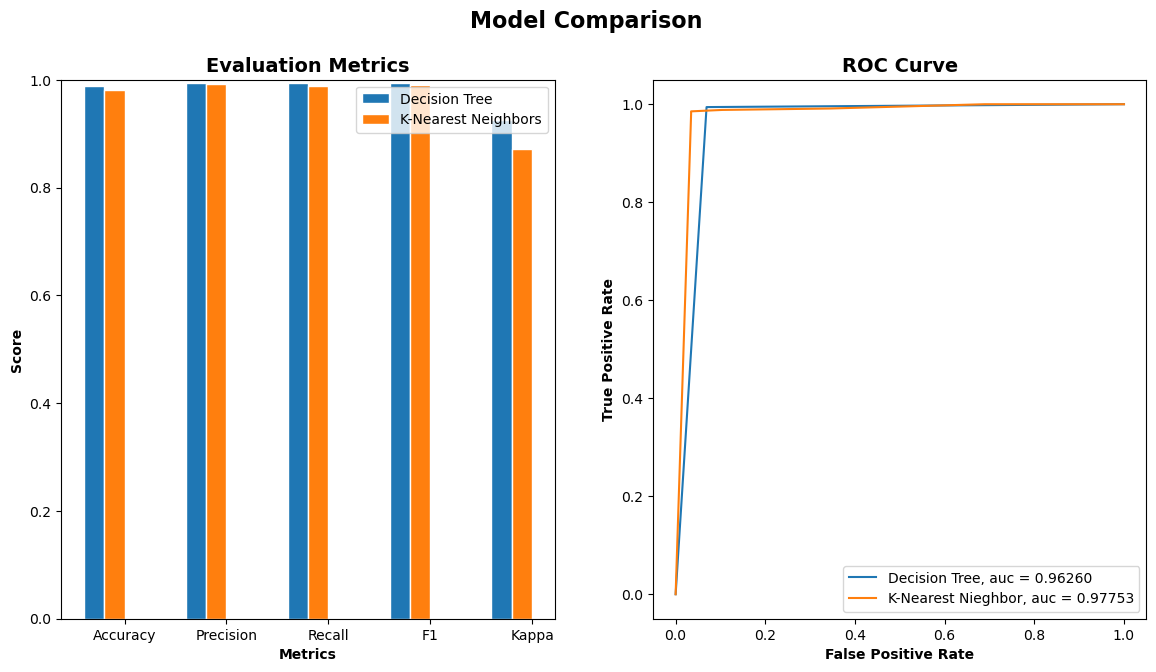

In [21]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Since the model has performed well on the test set, it doesnt require any hyperparameter tuning.